<a href="https://colab.research.google.com/github/seohyunjin/HK_DeepLearning-2021/blob/main/12_%ED%8C%8C%EB%A7%88%EC%9D%B8%EB%94%94%EC%96%B8_%EC%BD%94%EB%9E%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파마 인디언 당뇨병 예측

In [3]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]


Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [4]:
filename

'pima-indians-diabetes.csv'

In [5]:
import pandas as pd
df = pd.read_csv(filename, header = None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isnull().sum().sum()

0

In [7]:
import numpy as np
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

## 데이터 전처리 및 트레인/ 테스트 분할

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [10]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.iloc[:,:-1].values)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df.iloc[:,-1].values, 
    stratify = df.iloc[:,-1].values, random_state = seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

## 모델 정의/ 설정 / 학습 / 평가

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential()
model.add(Dense(12,input_shape=(8, ), activation ='relu' ) ) # Hidden Layer 1 
model.add(Dense(8, activation ='relu') ) # Output layer
model.add(Dense(1, activation= 'sigmoid') ) # Output layer
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(
loss = 'binary_crossentropy',
optimizer = 'adam',
metrics = ['accuracy']
)

In [17]:
# 모델학습
history = model.fit(
    X_train, y_train, 
    validation_split= 0.2, #테스트해보는 셋 지정
    epochs= 200, #epochs가 너무 크면 과대적합의 위험이 있다.
    batch_size=50, #한번에 처리할 수 있는 양을 지정
    verbose= 0
    )

In [18]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.4399 - accuracy: 0.8021


[0.43988940119743347, 0.8020833134651184]

### 훈련과정 시각화

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
x_len = np.arange(len(y_acc))

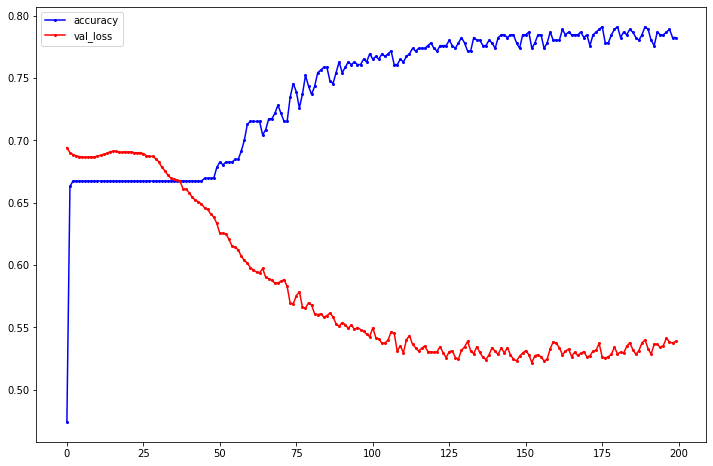

In [21]:
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()

In [22]:
# 파이썬 버전 확인
!python --version 

Python 3.7.10


In [23]:
#텐서플로우 버전
tf.__version__

'2.5.0'